### Plot zonal aspect class for HRU at different complexity levels ###
This code is used to check the calcualted zonal aspect results at different HRU discretization levels. 

In [2]:
import os, sys
import numpy as np
import rasterio as rio
import geopandas as gpd
sys.path.append('../')
import functions.utils as ut
import functions.geospatial_plot as gp
import functions.geospatial_analysis as ga
# sys.path.append('/glade/work/eriddle/python_eriddle/lib/python2.7/site-packages/')
# import descartes     # needed if using 'patches'

In [3]:
# common paths
control_file    = '../control_Utah.txt'
basin_name      = ut.read_from_control(control_file, 'basin_name')
basin_data_path = ut.read_from_control(control_file, 'basin_data_path')
plot_path       = os.path.join(basin_data_path, 'plots/')
gis_path        = os.path.join(basin_data_path, 'gis/')
results_path    = os.path.join(basin_data_path, 'results/')

In [4]:
# set basin shapefiles
basin_gru_shp             = ut.set_filename(control_file, 'basin_gru_shp')  # may exist
basin_flowlines_shp       = ut.set_filename(control_file, 'basin_flowlines_shp') # may exist; is always _prj
basin_dem_raster          = ut.set_filename(control_file, 'basin_dem_raster')  

# gru fieldname 
gruNo_fieldname           = ut.read_from_control(control_file, 'gruNo_fieldname')

# derived filenames
basin_gru_prj_shp         = basin_gru_shp.split('.shp')[0]+'_prj.shp'

#### Define HRU complexity levels ####
level 0: GRU = HRU. <br>
level 1a: use only elevation bands in HRU generation.<br>
level 1b: use only canopy class in HRU generation.<br>
level 1c: use only radiation class in HRU generation.<br>
level 2a: use elevation bands and canopy class in HRU generation.<br>
level 2b: use elevation bands and radiation class in HRU generation.<br>
level 2c: use canopy class and radiation class in HRU generation.<br>
level 3: use elevation bands, radiation class, canopy class in HRU generation.<br>

In [5]:
level_list = ['0','1a','1b','1c','2a','2b','2c','3']
#level_list = ['1c']

#### 1. Classify HRU zonal aspect ####

In [6]:
# classify aspect into 8 classes
for level in level_list:
    print('--- Complexity level %s ---' %(level))

    hru_str_simp    = 'hru_lev' + str(level) + '_simplified'   
    hru_vector_simp = os.path.join(results_path, hru_str_simp+'.shp')  

    hru_aspect_raster   = os.path.join(results_path, hru_vector_simp.split('.shp')[0]+'_attrb_aspect.tif') 
    aspect_class_raster = os.path.join(results_path, hru_aspect_raster.split('.tif')[0]+'_class.tif')        
    ga.classify_aspect(hru_aspect_raster, 8, aspect_class_raster)

--- Complexity level 0 ---
--- Complexity level 1a ---
--- Complexity level 1b ---
--- Complexity level 1c ---
--- Complexity level 2a ---
--- Complexity level 2b ---
--- Complexity level 2c ---
--- Complexity level 3 ---


#### 2. Plot HRU zonal aspect class ####

In [9]:
# plot settings
wgs_epsg = 4326          # projection used for plot
figsize  = (15, 15*0.6)
leg_ncol = 2
leg_loc  = 'lower right'
leg_bbox_to_anchor = (0.99, 0.01)

# legend dictionary. dist[raster_value]=list(color,label)
legend_dict={0:["black", "Flat (0)"],
             1:["red", "North (337.5 - 22.5)"],
             2:["orange", 'Northeast (22.5 - 67.5)'],
             3:["yellow", 'East (67.5 - 112.5)'], 
             4:["lime", 'Southeast (112.5 - 157.5)'], 
             5:["cyan", 'South (157.5 - 202.5)'], 
             6:["cornflowerblue", 'Southwest (202.5 - 247.5)'], 
             7:["blue", 'West (247.5 - 292.5)'], 
             8:["purple", 'Northwest (292.5 - 337.5)']} 

label_dict = {0:"Flat (0)",
              1:"North (337.7 - 22.5)",
              2:'Northeast (22.5 - 67.5)',
              3:'East (67.5 - 112.5)', 
              4:'Southeast (112.5 - 157.5)', 
              5:'South (157.5 - 202.5)', 
              6:'Southwest (202.5 - 247.5)', 
              7:'West (247.5 - 292.5)', 
              8:'Northwest (292.5 - 337.5)'}

cmap_str        = 'user'

--- Complexity level 0 ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [42602 24856 14739 33601 32192 43642 30673 45468]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


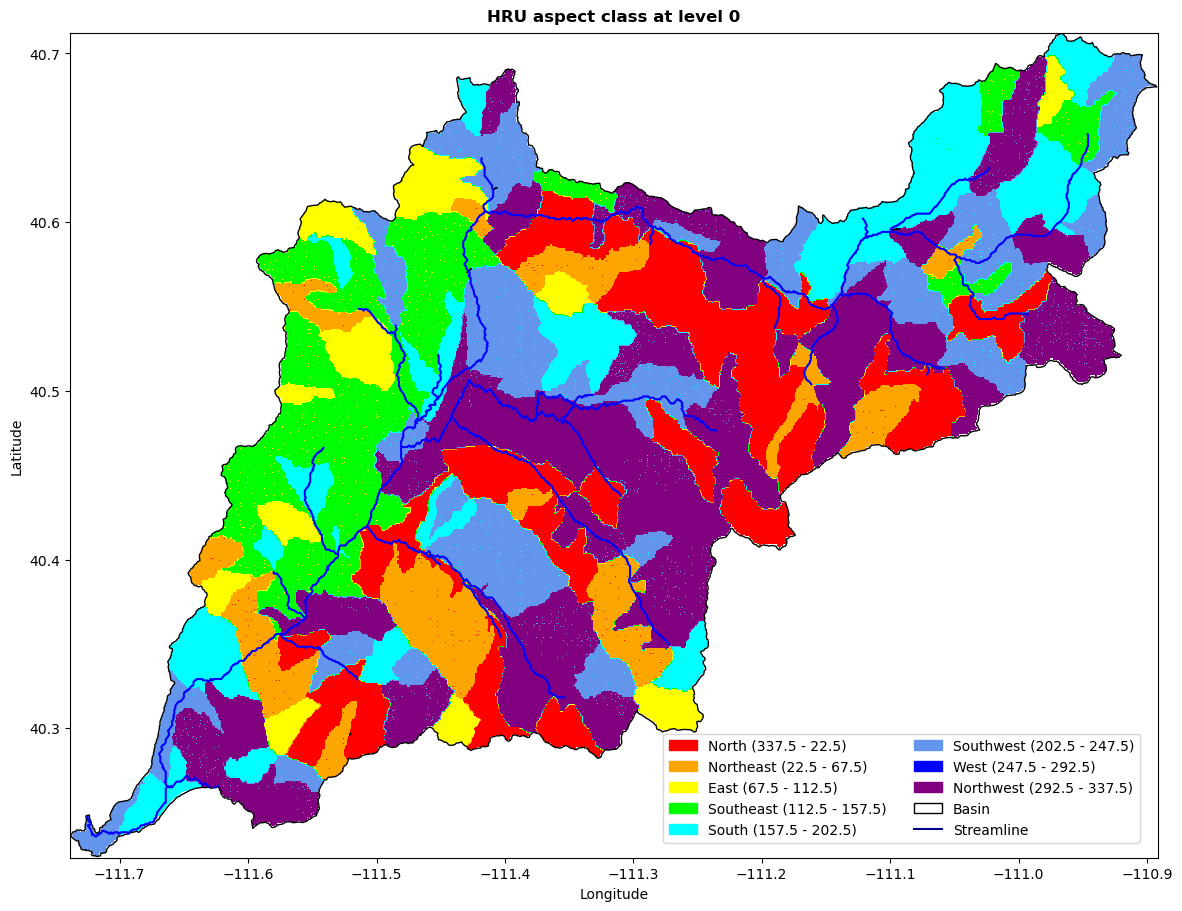

--- Complexity level 1a ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [46250 26126 19388 25884 34483 41137 37268 37237]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


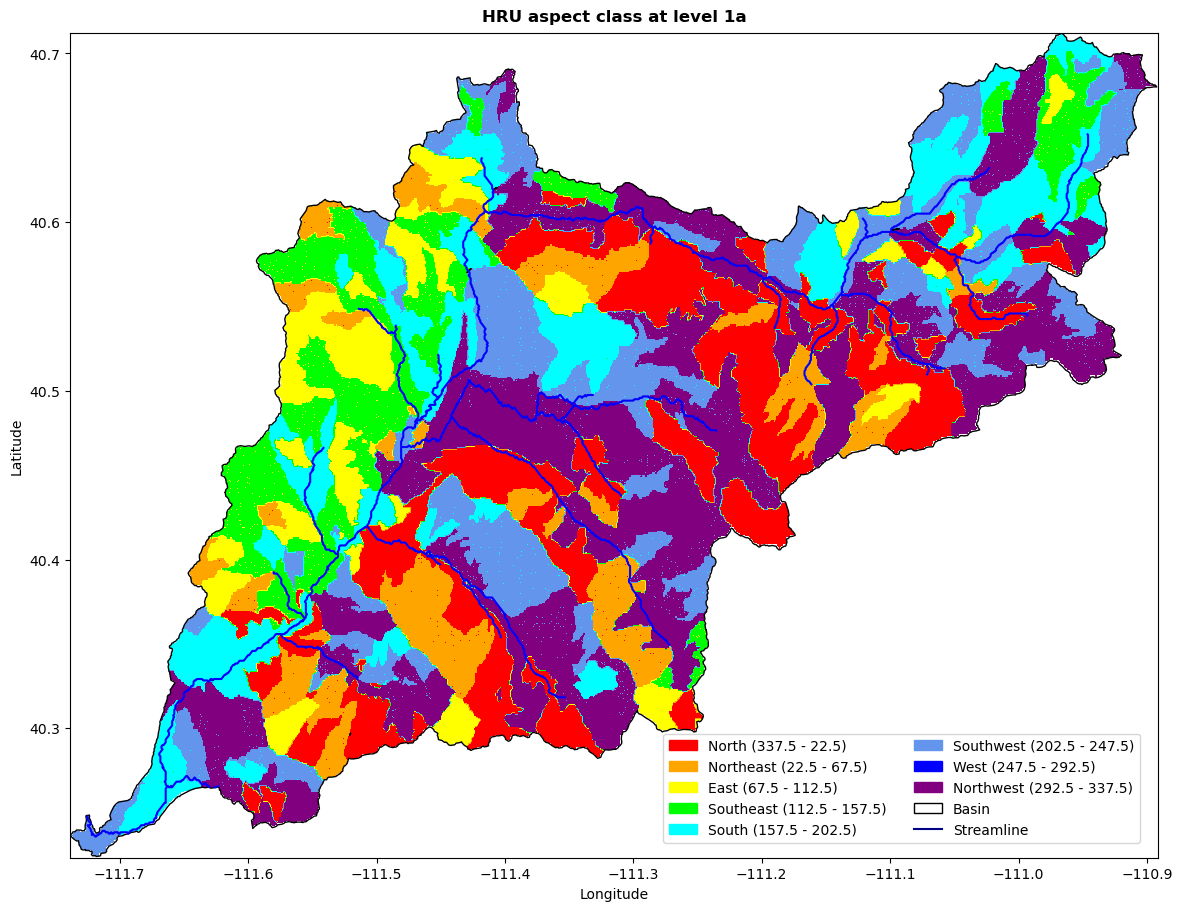

--- Complexity level 1b ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [42892 21110 18018 36025 29729 43821 34984 41194]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


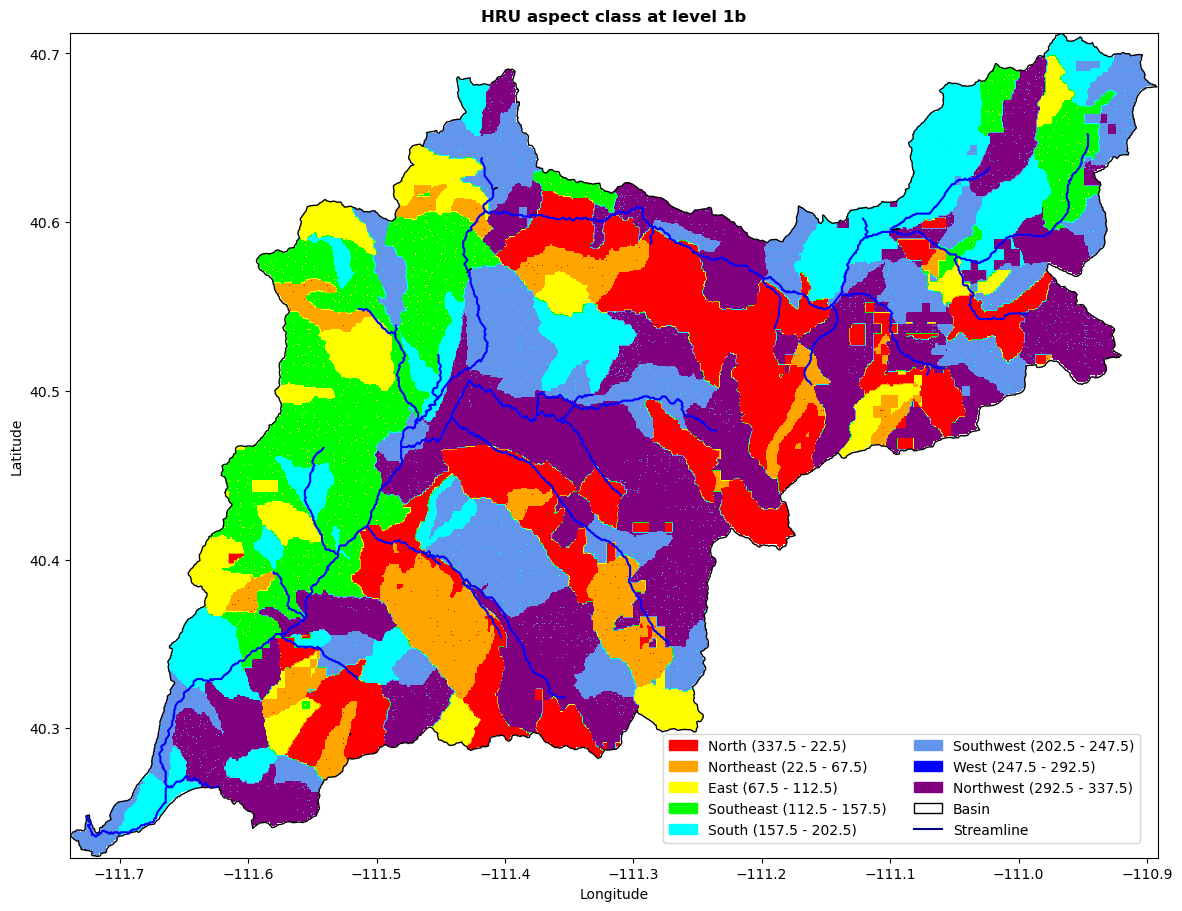

--- Complexity level 1c ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [60527 26557 15255 15855 55354 34189 28329 31707]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


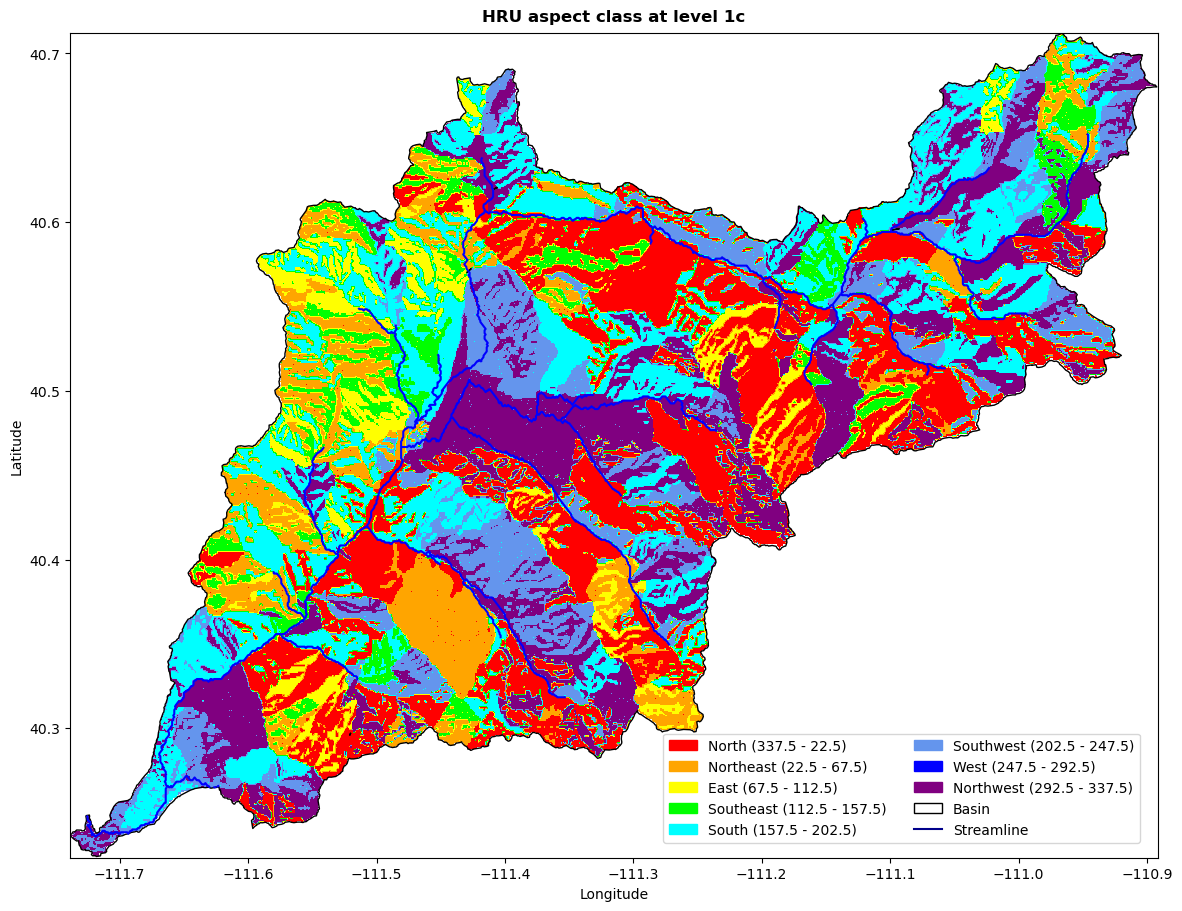

--- Complexity level 2a ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [43706 26228 19669 25943 34216 41511 37419 39081]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


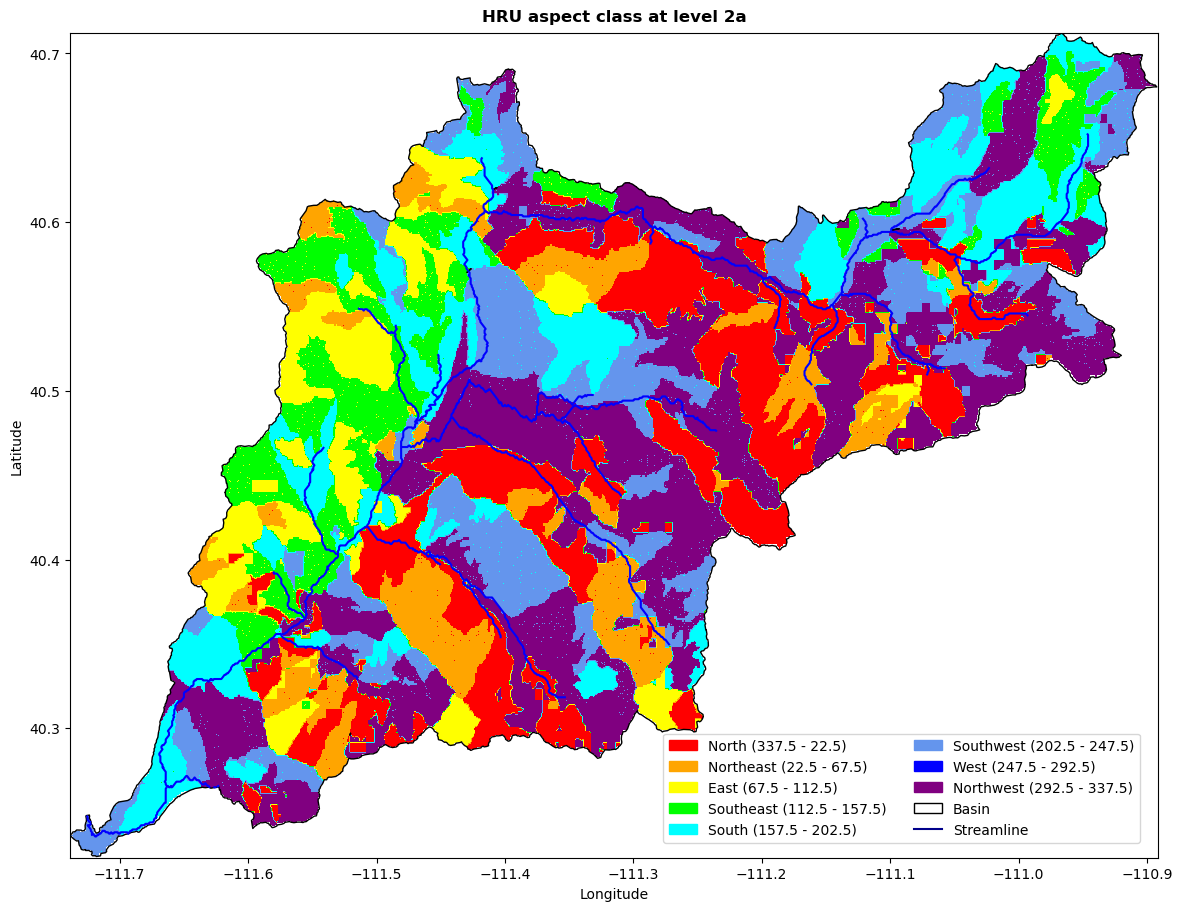

--- Complexity level 2b ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [62120 24609 12604 19384 55603 32283 27050 34120]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


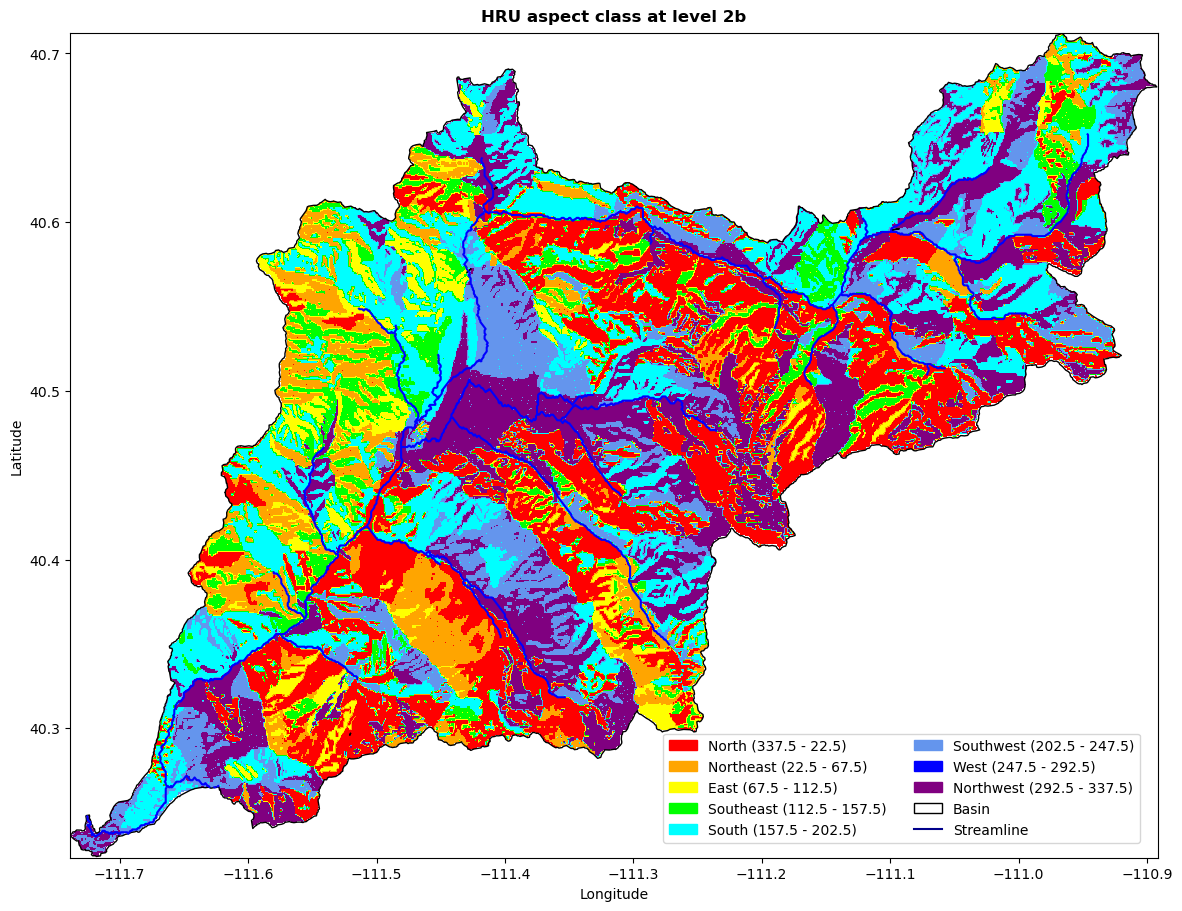

--- Complexity level 2c ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [59567 26581 16631 16237 53895 35669 27715 31478]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


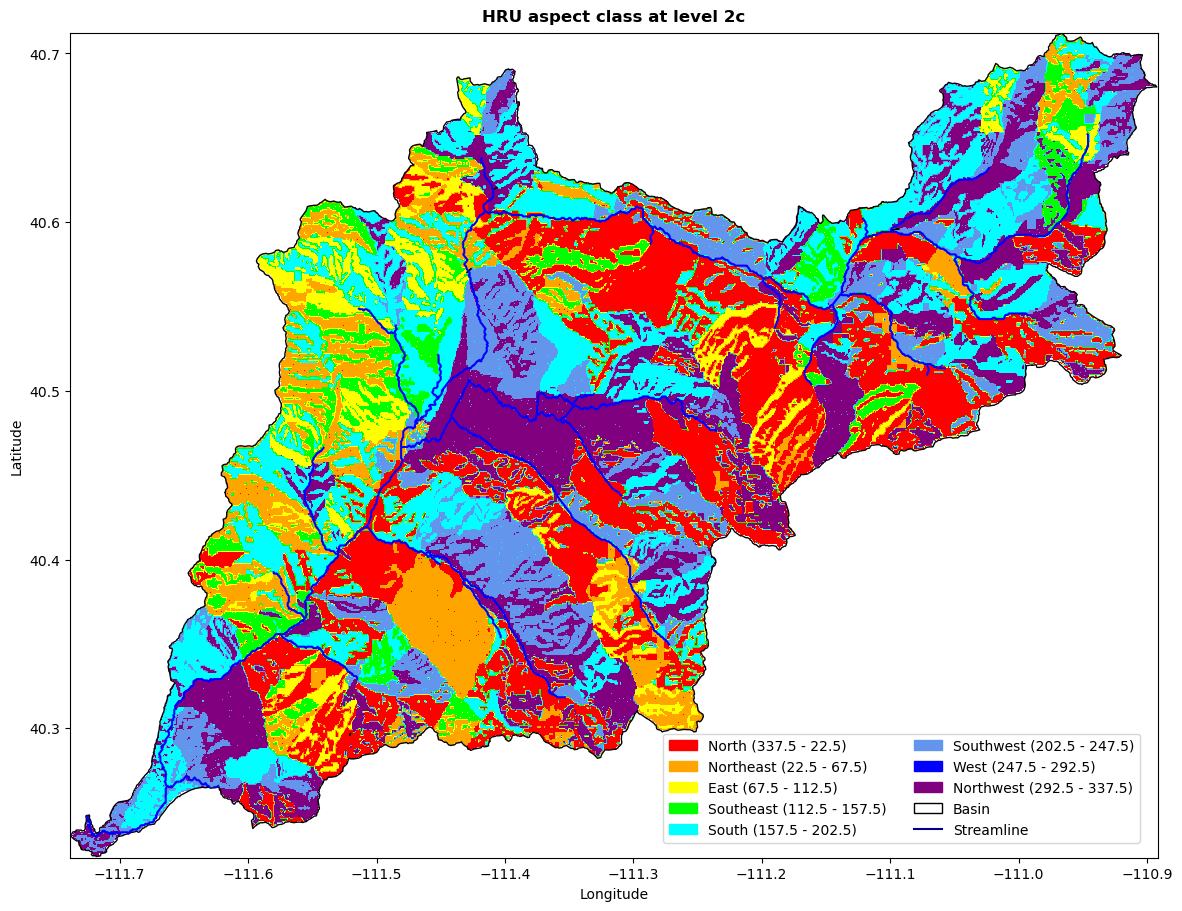

--- Complexity level 3 ---
data_unique: [1 2 3 4 5 6 7 8]
data_counts: [60781 25295 12366 20316 54151 33105 26619 35140]
length data_unique: 8
legend_labels: {1: ['red', 'North (337.5 - 22.5)'], 2: ['orange', 'Northeast (22.5 - 67.5)'], 3: ['yellow', 'East (67.5 - 112.5)'], 4: ['lime', 'Southeast (112.5 - 157.5)'], 5: ['cyan', 'South (157.5 - 202.5)'], 6: ['cornflowerblue', 'Southwest (202.5 - 247.5)'], 7: ['blue', 'West (247.5 - 292.5)'], 8: ['purple', 'Northwest (292.5 - 337.5)']}


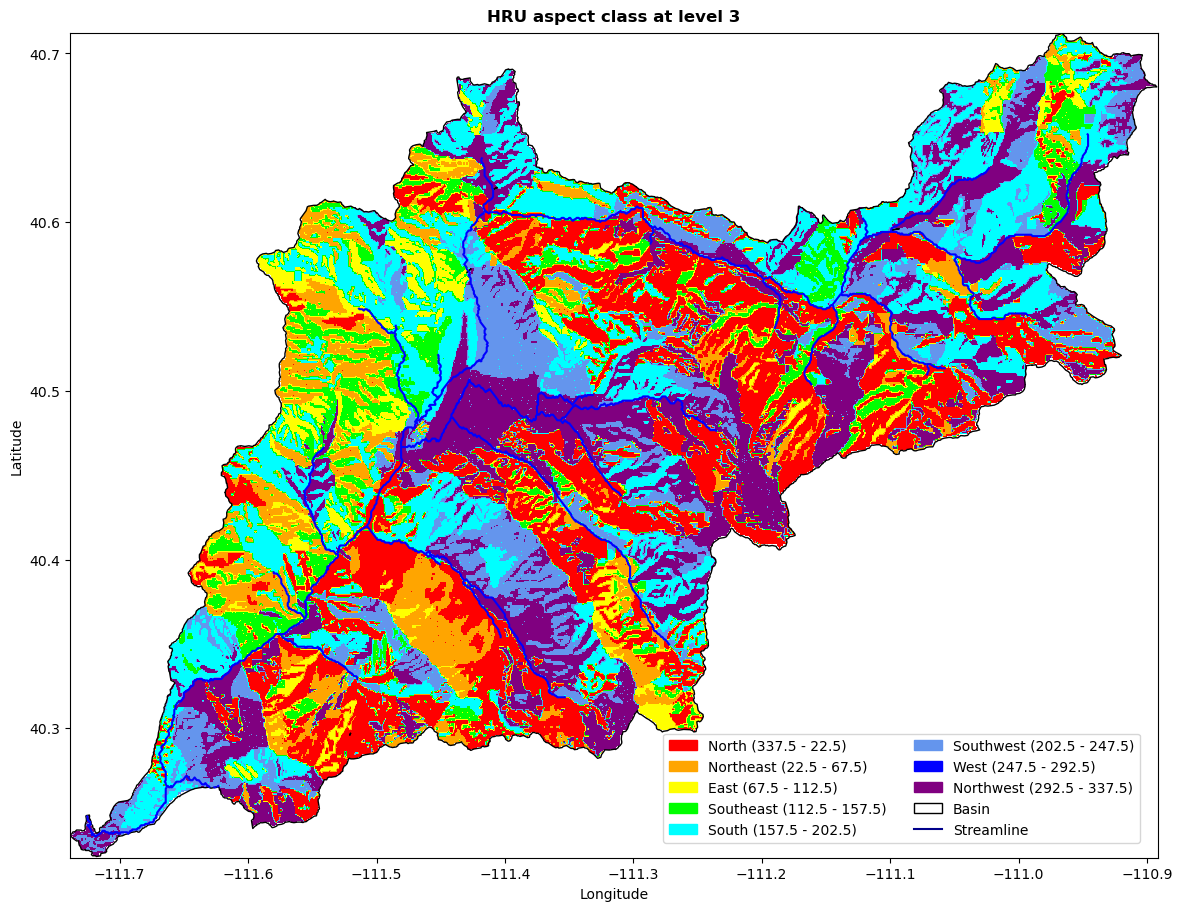

In [10]:
for level in level_list:
    print('--- Complexity level %s ---' %(level))

    hru_str_simp        = 'hru_lev' + str(level) + '_simplified'   
    hru_vector_simp     = os.path.join(results_path, hru_str_simp+'.shp')  
    hru_aspect_raster   = os.path.join(results_path, hru_vector_simp.split('.shp')[0]+'_attrb_aspect.tif') 
    aspect_class_raster = os.path.join(results_path, hru_aspect_raster.split('.tif')[0]+'_class.tif')        
    
    # more plot settings
    title           = 'HRU aspect class at level ' + level
    output_fig_file = os.path.join(plot_path, hru_str_simp+'_aspect_class.png')
    
    # plot
    gp.plot_raster_and_bound_stream(aspect_class_raster, basin_gru_prj_shp, basin_flowlines_shp, wgs_epsg, 
                                    cmap_str, legend_dict, figsize, title, leg_loc, leg_bbox_to_anchor, leg_ncol, output_fig_file)
